Found 2603 images belonging to 4 classes.
Found 647 images belonging to 4 classes.
Epoch 1/16
81/81 ━━━━━━━━━━━━━━━━━━━━ 22s 250ms/step - accuracy: 0.5778 - loss: 1.0904 - val_accuracy: 0.9062 - val_loss: 0.2936 - learning_rate: 5.0000e-04
Epoch 2/16
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - accuracy: 0.9375 - loss: 0.2270 - val_accuracy: 0.8571 - val_loss: 0.1344 - learning_rate: 5.0000e-04
Epoch 3/16
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 247ms/step - accuracy: 0.9799 - loss: 0.1309 - val_accuracy: 0.9312 - val_loss: 0.1539 - learning_rate: 5.0000e-04
Epoch 4/16
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step - accuracy: 0.9688 - loss: 0.0721 - val_accuracy: 1.0000 - val_loss: 0.1004 - learning_rate: 5.0000e-04
Epoch 5/16
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 246ms/step - accuracy: 0.9994 - loss: 0.0079 - val_accuracy: 0.9953 - val_loss: 0.0373 - learning_rate: 5.0000e-04
Epoch 6/16
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step - accuracy: 1.0000 - loss: 5.8364e-04 - val_accuracy: 1.0000 - val_loss: 0.0390 - 

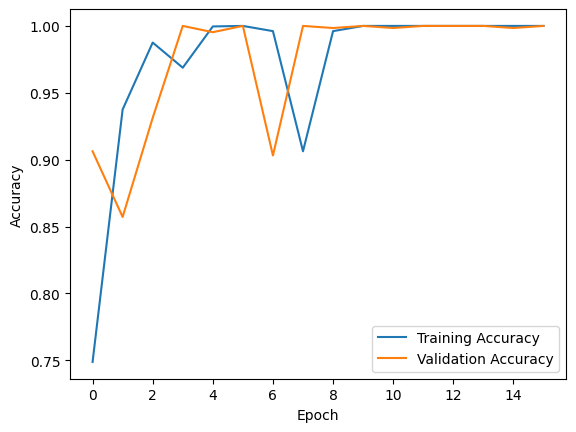

In [3]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import cv2

# Preprocessing function to replace white background with black
def replace_white_background(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = cv2.inRange(image, np.array([240, 240, 240]), np.array([255, 255, 255]))
    image[mask == 255] = [0, 0, 0]
    return image

# Directory and model parameters
train_dir = 'dataset'
img_width, img_height = 150, 150
batch_size = 32
epochs = 16

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    preprocessing_function=replace_white_background
)

# Data generators for training and validation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Define an extremely simplified CNN model
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu'),  # Added layer
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005),  # Lower learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[lr_scheduler]
)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model
model.save('fruit_classifier_model_minimal_2.keras')
